In [2]:
# https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


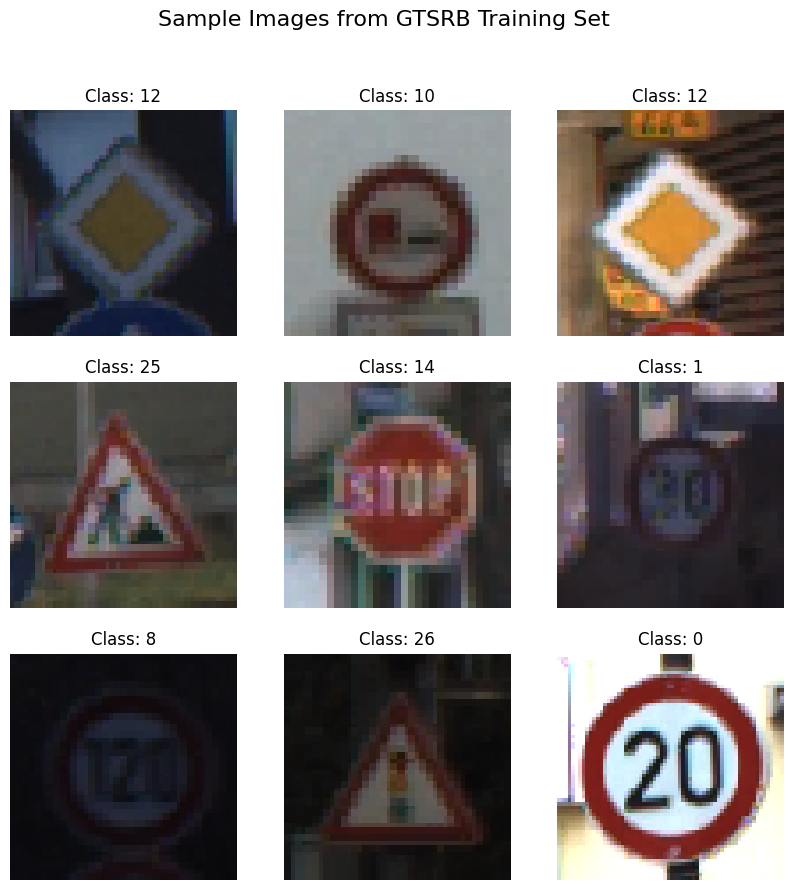

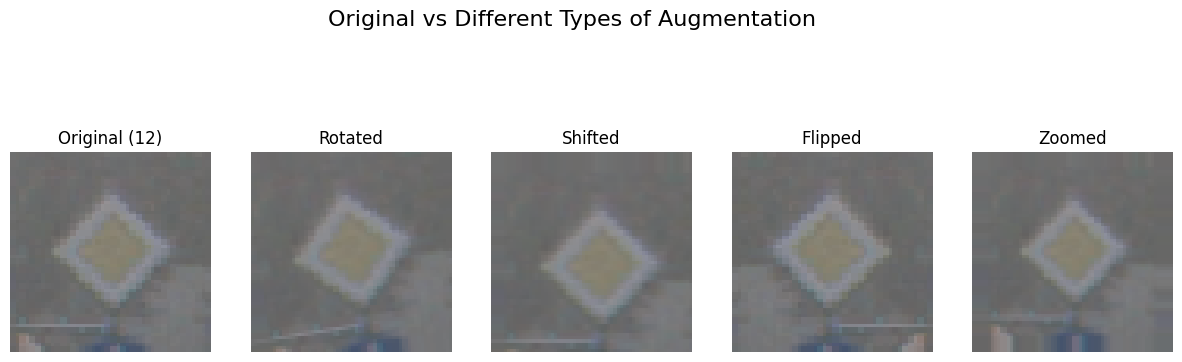


Training model with 1 hidden layers, 64 neurons, patience=2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 184s 182ms/step - accuracy: 0.4255 - loss: 2.1583 - val_accuracy: 0.8271 - val_loss: 0.6493
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8141 - loss: 0.5906 - val_accuracy: 0.8990 - val_loss: 0.3903
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8780 - loss: 0.3805 - val_accuracy: 0.9022 - val_loss: 0.3671
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9066 - loss: 0.2822 - val_accuracy: 0.9093 - val_loss: 0.3167
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9221 - loss: 0.2331 - val_accuracy: 0.9077 - val_loss: 0.3508

Training model with 2 hidden layers, 128 neurons, patience=2
Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.3158 - loss: 2.4398 - val_accuracy: 0.7882 - val_loss: 0.7259
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8028 - loss: 0.6066 - val_accuracy: 0.8679 - val_loss: 0.4667
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 

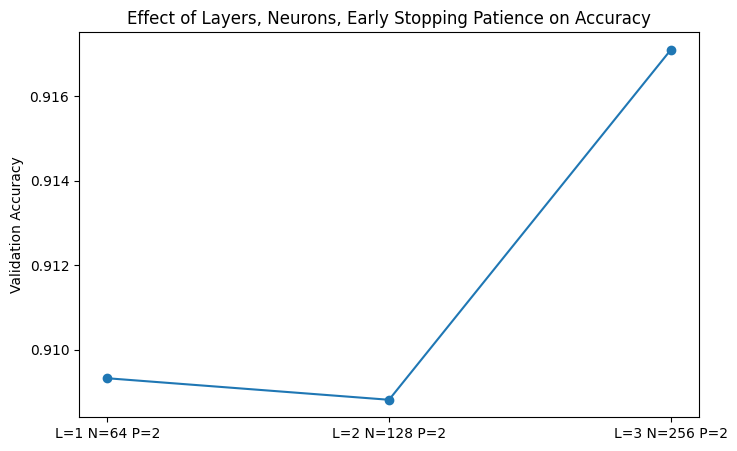

In [3]:
# ===============================
# STEP 1: Import Libraries
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# STEP 2: Define Dataset Paths
# ===============================
DATA_DIR = "/kaggle/input/gtsrb-german-traffic-sign"
train_path = os.path.join(DATA_DIR, "Train")
test_path = os.path.join(DATA_DIR, "Test")

IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# ===============================
# STEP 3: Data Generators
# ===============================
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# ===============================
# STEP 4: Show Sample Images
# ===============================
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {list(train_generator.class_indices.keys())[labels[i].argmax()]}")
    plt.axis('off')
plt.suptitle("Sample Images from GTSRB Training Set", fontsize=16)
plt.show()

# ===============================
# STEP 5: Human-Friendly Augmentation
# ===============================
from tensorflow.keras.preprocessing.image import array_to_img

# Pick one image
orig_images, orig_labels = next(train_generator)
image_to_augment = orig_images[0]
label_index = orig_labels[0].argmax()
label_name = list(train_generator.class_indices.keys())[label_index]

plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 5, 1)
plt.imshow(image_to_augment)
plt.title(f"Original ({label_name})")
plt.axis('off')

# Rotation
rot_datagen = ImageDataGenerator(rotation_range=30)
rot_img = next(rot_datagen.flow(np.expand_dims(image_to_augment, 0)))[0]
plt.subplot(1, 5, 2)
plt.imshow(rot_img)
plt.title("Rotated")
plt.axis('off')

# Shift
shift_datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
shift_img = next(shift_datagen.flow(np.expand_dims(image_to_augment, 0)))[0]
plt.subplot(1, 5, 3)
plt.imshow(shift_img)
plt.title("Shifted")
plt.axis('off')

# Flipped
flip_datagen = ImageDataGenerator(horizontal_flip=True)
flip_img = next(flip_datagen.flow(np.expand_dims(image_to_augment, 0)))[0]
plt.subplot(1, 5, 4)
plt.imshow(flip_img)
plt.title("Flipped")
plt.axis('off')

# Zoomed
zoom_datagen = ImageDataGenerator(zoom_range=0.3)
zoom_img = next(zoom_datagen.flow(np.expand_dims(image_to_augment, 0)))[0]
plt.subplot(1, 5, 5)
plt.imshow(zoom_img)
plt.title("Zoomed")
plt.axis('off')

plt.suptitle("Original vs Different Types of Augmentation", fontsize=16)
plt.show()

# ===============================
# STEP 6: CNN Model Builder
# ===============================
def build_cnn(num_hidden_layers=1, neurons=128, input_shape=(64,64,3), num_classes=43):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(neurons, activation='relu'))
        model.add(layers.Dropout(0.3))

    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# ===============================
# STEP 7: Train Different Models (Faster)
# ===============================
configs = [
    {"layers":1, "neurons":64, "patience":2},
    {"layers":2, "neurons":128, "patience":2},
    {"layers":3, "neurons":256, "patience":2},
]

results = []

for cfg in configs:
    print(f"\nTraining model with {cfg['layers']} hidden layers, {cfg['neurons']} neurons, patience={cfg['patience']}")

    model = build_cnn(num_hidden_layers=cfg['layers'], neurons=cfg['neurons'],
                      input_shape=(64,64,3), num_classes=len(train_generator.class_indices))

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=cfg['patience'],
        restore_best_weights=True
    )

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=5,  # reduced for faster demo
        callbacks=[early_stop],
        verbose=1
    )

    val_acc = max(history.history['val_accuracy'])
    results.append({
        "layers": cfg['layers'],
        "neurons": cfg['neurons'],
        "patience": cfg['patience'],
        "val_acc": val_acc
    })






# ===============================
# STEP 8: Show Results
# ===============================
import pandas as pd
results_df = pd.DataFrame(results)
print("\nComparison of different models:")
print(results_df)

plt.figure(figsize=(8,5))
plt.plot(results_df['val_acc'], marker='o')
plt.xticks(range(len(results_df)), [f"L={r['layers']} N={r['neurons']} P={r['patience']}" for r in results])
plt.ylabel("Validation Accuracy")
plt.title("Effect of Layers, Neurons, Early Stopping Patience on Accuracy")
plt.show()
